In [9]:
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
N_SIDE_LENSLET=10
n = N_SIDE_LENSLET*10
tel = ceo.Telescope(n,25.5)

In [11]:
N_GS = 3
zen = np.linspace(0,ceo.constants.ARCMIN2RAD,N_GS)
azi = np.zeros((1,N_GS))
src = ceo.Source('J',resolution=(n,n),magnitude=14)
src.masked(tel)

In [12]:
pym = ceo.Pyramid(N_SIDE_LENSLET,n,modulation=0.0,N_GS=N_GS)

In [13]:
tid = ceo.StopWatch()
tid.tic()
pym.propagate(src)
tid.toc()
print tid.elapsedTime

1.22051203251


(120, 40)


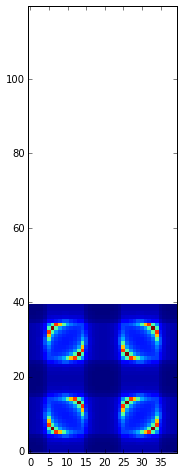

In [14]:
fig = figure()
fig.set_size_inches(8,8)
imshow(pym.camera.frame.host(),interpolation='none',origin='lower')
print pym.camera.frame.host().shape